## Exercise

- Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

    1. Build a deep learning model to predict churn rate at bank. 

    2. Once model is built, print classification report and analyze precision, recall and f1-score 

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [251]:
df = pd.read_csv('datasets/Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5070,5071,15794468,Tsou,641,France,Female,42,6,0.00,2,0,0,121138.77,0
8616,8617,15725076,Anderson,653,Spain,Female,27,6,107751.68,2,1,1,33389.42,0
3126,3127,15691808,King,656,France,Male,43,7,134919.85,1,1,0,194691.95,0
881,882,15571928,Fraser,679,France,Female,43,4,0.00,3,1,0,115136.51,1
7781,7782,15759184,Russell,705,France,Male,34,7,117715.84,1,1,0,2498.67,0


In [252]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [254]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [255]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [256]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [257]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [258]:
df1 = pd.get_dummies(data = df, columns = ['Geography', 'Gender']).astype(int)
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [259]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0


In [260]:
X = pd.get_dummies(X, drop_first = True).astype(float)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506733,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334028,0.000000,0.0,1.0,0.562708,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636354,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500243,0.000000,1.0,1.0,0.395403,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,1.0,0.0,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228655,0.000000,1.0,1.0,0.508488,1.0,0.0,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0,1.0,0.0
9998,0.844,0.324324,0.3,0.299225,0.333333,1.0,0.0,0.464429,0.0,1.0,0.0,0.0,1.0


In [261]:
from sklearn.preprocessing import MinMaxScaler

In [262]:
scaler = MinMaxScaler()

In [263]:
col_to_scale=['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']

In [264]:
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [265]:
X = df1.drop('Exited', axis='columns')
y = df1.Exited

In [266]:
from imblearn.over_sampling import SMOTE

In [267]:
smote = SMOTE(sampling_strategy = 'minority')

In [268]:
X_sm, y_sm = smote.fit_resample(X, y)

In [269]:
y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, 
                                                    y_sm, 
                                                    test_size = 0.2,
                                                    stratify = y_sm,)
                                                    # random_state = 1000)

In [272]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [273]:
X_train.shape

(12740, 13)

In [274]:
import tensorflow as tf
from tensorflow import keras

In [275]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape = (13,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

c:\Users\soura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [276]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333 (1.30 KB)

 Trainable params: 333 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

In [277]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy', # This model is for seperate categories
    metrics = ['accuracy']
)

In [278]:
model.fit(X_train,
          y_train,
          batch_size = 32,
          epochs = 100)

Epoch 1/100


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.5784 - loss: 0.6764
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.6596 - loss: 0.6218
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.6834 - loss: 0.5927
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.7093 - loss: 0.5660
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.7209 - loss: 0.5547
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.7255 - loss: 0.5452
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.7361 - loss: 0.5295
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.7467 - loss: 0.5104
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.7572 - loss: 0.4927
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.7627 - loss: 0.4852
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.7683 - loss: 0.4753
Epoch 12/100
399/399 ━━━━━━━━━━

In [285]:
X_test.shape

(3186, 13)

In [286]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(y_test.shape[0],).astype(int)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step


In [287]:
from sklearn.metrics import classification_report

In [288]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1593
           1       0.00      0.00      0.00      1593

    accuracy                           0.50      3186
   macro avg       0.25      0.50      0.33      3186
weighted avg       0.25      0.50      0.33      3186



c:\Users\soura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\soura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\soura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [289]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1593,    0],
       [1593,    0]])>

Text(95.72222222222221, 0.5, 'Truth')

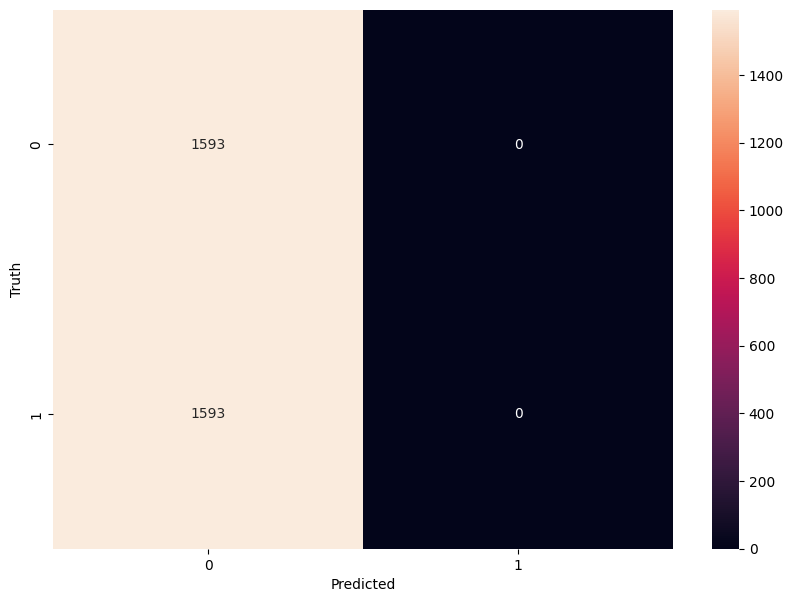

In [284]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')